In [1]:
import pickle

import pandas as pd
import numpy as np
from pathlib import Path
import h5py
from tqdm import tqdm
from matplotlib import pyplot as plt

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


# FAH_BLCA

- batch-1，uploaded in 2023-12-24
- batch-2，uploaded in 2024-1-5

In [9]:
slides_path = Path.cwd() / 'slides'
uploaded_svs = slides_path.glob('*.svs')

In [11]:
with open('./misc_files/batch1_annotated_slides.txt','w') as f:
    for i in uploaded_svs:
        f.write(str(i) + '\n')

In [12]:
cases = list(Path('/GPUFS/sysu_jhluo_1/wangyh/data/FAH_BLCA/raw_patches/size512').rglob('*.h5'))
SIZE = 512
cases_select = cases[1:3]

In [14]:
cases_select

[PosixPath('/GPUFS/sysu_jhluo_1/wangyh/data/FAH_BLCA/raw_patches/size512/20X/P21012824_7P_1325.h5'),
 PosixPath('/GPUFS/sysu_jhluo_1/wangyh/data/FAH_BLCA/raw_patches/size512/20X/E23002418_5I_1886.h5')]

In [28]:
for case in tqdm(cases_select):
    normed_images = []
    normed_coords = []
    
    with h5py.File(case, 'r') as f:
        tiles = f['image_array'][:]
        coords = f['coords'][:]
        
        print(tiles.shape)
#         count = 0
#         for tile,coord in zip(tiles,coords):
#             if count // 20 == 0:
#                 normed_images.append(tile)
#                 normed_coords.append(coord)
#             count += 1
#         print(np.array(normed_coords).shape)
#         print(np.stack(normed_coords).shape)

 50%|█████     | 1/2 [00:00<00:00,  1.21it/s]

(913, 512, 512, 3)


100%|██████████| 2/2 [00:01<00:00,  1.30it/s]

(311, 512, 512, 3)


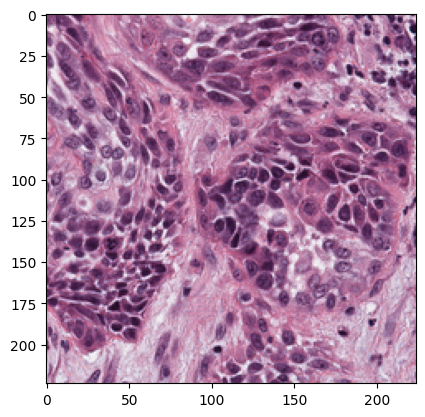

In [10]:
template_file = np.load('/GPUFS/sysu_jhluo_1/wangyh/data/CN_patches/CN_template.npy')
plt.imshow(template_file)

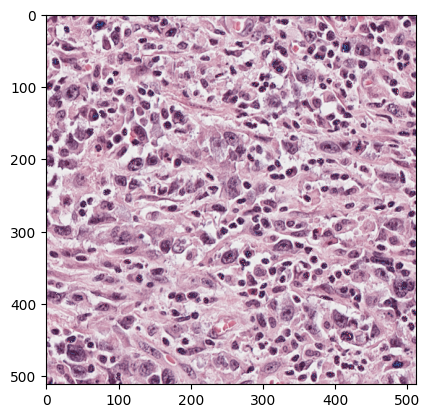

In [7]:
og_case_path = '/GPUFS/sysu_jhluo_1/wangyh/data/FAH_BLCA/raw_patches/size512/20X/E23001158_10I_1825.h5'
CNed_case_path = '/GPUFS/sysu_jhluo_1/wangyh/data/FAH_BLCA/CN_patches/size512/20X/E23001158_10I_1825.h5'
with h5py.File(CNed_case_path, 'r') as f:
        tiles = f['image_array'][:]
        coords = f['coords'][:]
        plt.imshow(tiles[15])

In [34]:
with open('/GPUFS/sysu_jhluo_1/wangyh/data/FAH_BLCA/CN_patches/unnormed_1.pkl','rb') as f:
    unnormed = pickle.load(f)
    print(unnormed)

[]


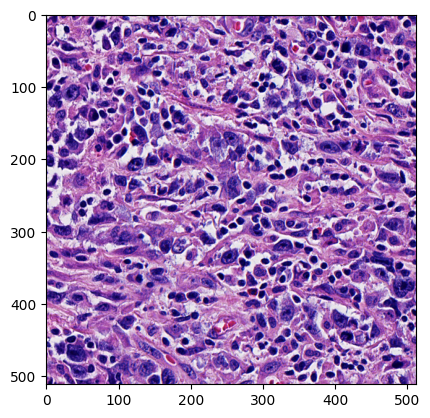

In [6]:
with h5py.File(og_case_path, 'r') as f:
        tiles = f['image_array'][:]
        coords = f['coords'][:]
        plt.imshow(tiles[15])

In [44]:
import torchvision.transforms as transforms

data_transform = transforms.Compose([transforms.ToTensor(),
                                     transforms.Resize(224),                                     
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
with h5py.File('/GPUFS/sysu_jhluo_1/wangyh/data/FAH_BLCA/CN_patches/size512/10X/E23001158_10I_1825.h5') as f:
    CN_patches = f['image_array'][:]
    images = []
    for image in CN_patches:
        image_tensor = data_transform(image).unsqueeze(0)
        images.append(image_tensor)
    print(images[0].shape)

torch.Size([1, 3, 224, 224])


In [3]:
with open(f'/GPUFS/sysu_jhluo_1/wangyh/data/FAH_BLCA/features/size512/pretrained_resnet18/10X_features.pkl','rb') as f:
    features = pickle.load(f)

In [4]:
features

{'E23001158_10I_1825': {'seq_id': '1825',
  'features': tensor([[9.1653e-01, 2.1259e-01, 3.7261e-02,  ..., 2.8305e+00, 0.0000e+00,
           3.5390e-04],
          [9.2068e-01, 3.3075e-01, 2.3956e-02,  ..., 1.0202e-01, 7.0331e-02,
           3.3954e-01],
          [9.2320e-01, 3.4434e-01, 2.0709e-03,  ..., 8.0403e-01, 1.3349e-02,
           4.7155e-02],
          ...,
          [1.4095e+00, 1.6149e-01, 7.3069e-02,  ..., 6.0530e-01, 6.4329e-02,
           0.0000e+00],
          [1.7802e+00, 1.5214e-01, 2.1984e-02,  ..., 1.8110e+00, 0.0000e+00,
           4.3512e-01],
          [2.3741e+00, 1.7931e-01, 1.3691e-01,  ..., 2.2924e+00, 4.8607e-03,
           0.0000e+00]])},
 'P21012824_7P_1325': {'seq_id': '1325',
  'features': tensor([[1.3249e+00, 2.4633e-01, 1.2314e-02,  ..., 8.0086e-01, 0.0000e+00,
           8.3945e-02],
          [1.9085e+00, 8.4472e-02, 3.2926e-01,  ..., 1.9739e+00, 0.0000e+00,
           7.7955e-03],
          [7.9548e-01, 2.7532e-01, 5.9154e-02,  ..., 1.0714e+00, 1.

In [9]:
feature_og = features['E23001158_10I_1825']['features']
feature_og

tensor([[9.1653e-01, 2.1259e-01, 3.7261e-02,  ..., 2.8305e+00, 0.0000e+00,
         3.5390e-04],
        [9.2068e-01, 3.3075e-01, 2.3956e-02,  ..., 1.0202e-01, 7.0331e-02,
         3.3954e-01],
        [9.2320e-01, 3.4434e-01, 2.0709e-03,  ..., 8.0403e-01, 1.3349e-02,
         4.7155e-02],
        ...,
        [1.4095e+00, 1.6149e-01, 7.3069e-02,  ..., 6.0530e-01, 6.4329e-02,
         0.0000e+00],
        [1.7802e+00, 1.5214e-01, 2.1984e-02,  ..., 1.8110e+00, 0.0000e+00,
         4.3512e-01],
        [2.3741e+00, 1.7931e-01, 1.3691e-01,  ..., 2.2924e+00, 4.8607e-03,
         0.0000e+00]])

In [10]:
from sklearn.utils import shuffle
feature = shuffle(feature_og)
feature

tensor([[9.2320e-01, 3.4434e-01, 2.0709e-03,  ..., 8.0403e-01, 1.3349e-02,
         4.7155e-02],
        [2.3741e+00, 1.7931e-01, 1.3691e-01,  ..., 2.2924e+00, 4.8607e-03,
         0.0000e+00],
        [9.0425e-02, 1.8183e-01, 4.7223e-02,  ..., 2.6051e-01, 0.0000e+00,
         2.5734e-02],
        ...,
        [1.4095e+00, 1.6149e-01, 7.3069e-02,  ..., 6.0530e-01, 6.4329e-02,
         0.0000e+00],
        [1.7802e+00, 1.5214e-01, 2.1984e-02,  ..., 1.8110e+00, 0.0000e+00,
         4.3512e-01],
        [1.4957e+00, 2.2853e-01, 8.7289e-02,  ..., 1.9285e+00, 0.0000e+00,
         1.1991e-02]])